In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(".."))
from utils import load_in_rgb

plt.rcParams['figure.figsize'] = [25, 10]

(<Axes: title={'center': 'Shot with wrong WB 3'}>,
 Text(0.5, 1.0, 'Shot with wrong WB 3'))

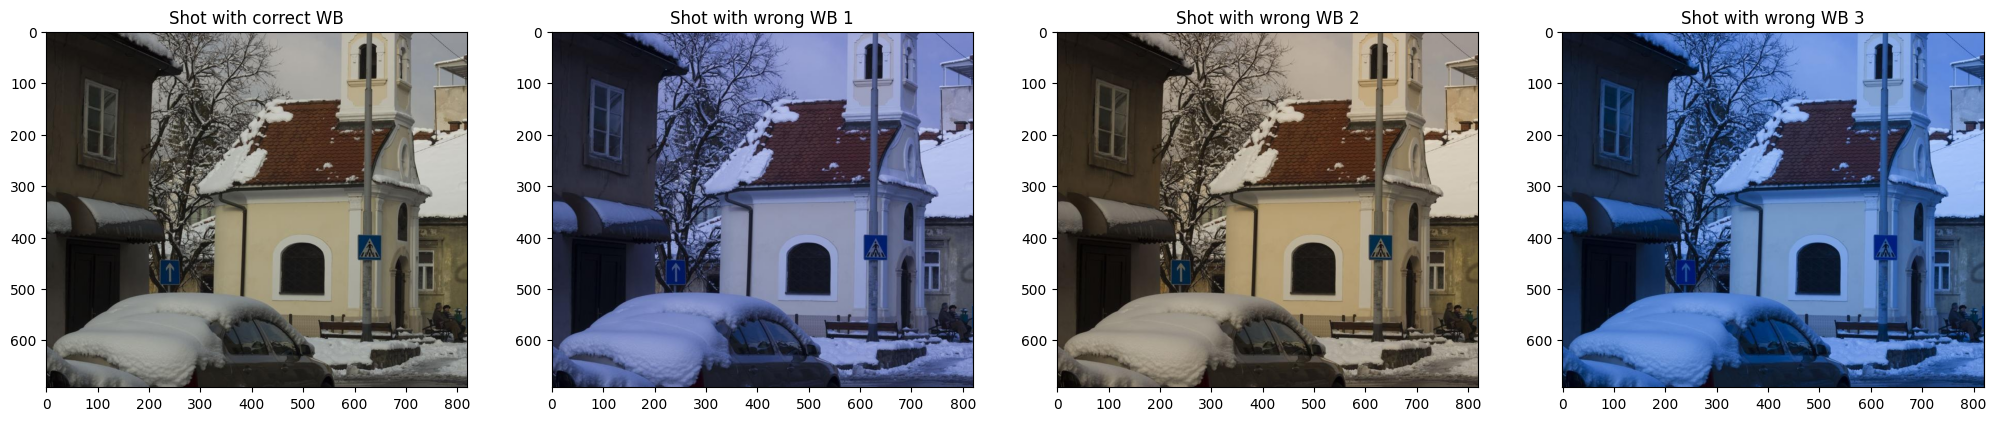

In [2]:
target = load_in_rgb("data/target.JPG")
bad_wb_1 = load_in_rgb("data/bad_wb_1.JPG")
bad_wb_2 = load_in_rgb("data/bad_wb_2.JPG")
bad_wb_3 = load_in_rgb("data/bad_wb_3.JPG")

plt.subplot(141), plt.imshow(target), plt.title('Shot with correct WB')
plt.subplot(142), plt.imshow(bad_wb_1), plt.title('Shot with wrong WB 1')
plt.subplot(143), plt.imshow(bad_wb_2), plt.title('Shot with wrong WB 2')
plt.subplot(144), plt.imshow(bad_wb_3), plt.title('Shot with wrong WB 3')

(<Axes: title={'center': 'Target'}>,
 Text(0.5, 1.0, 'Target'))

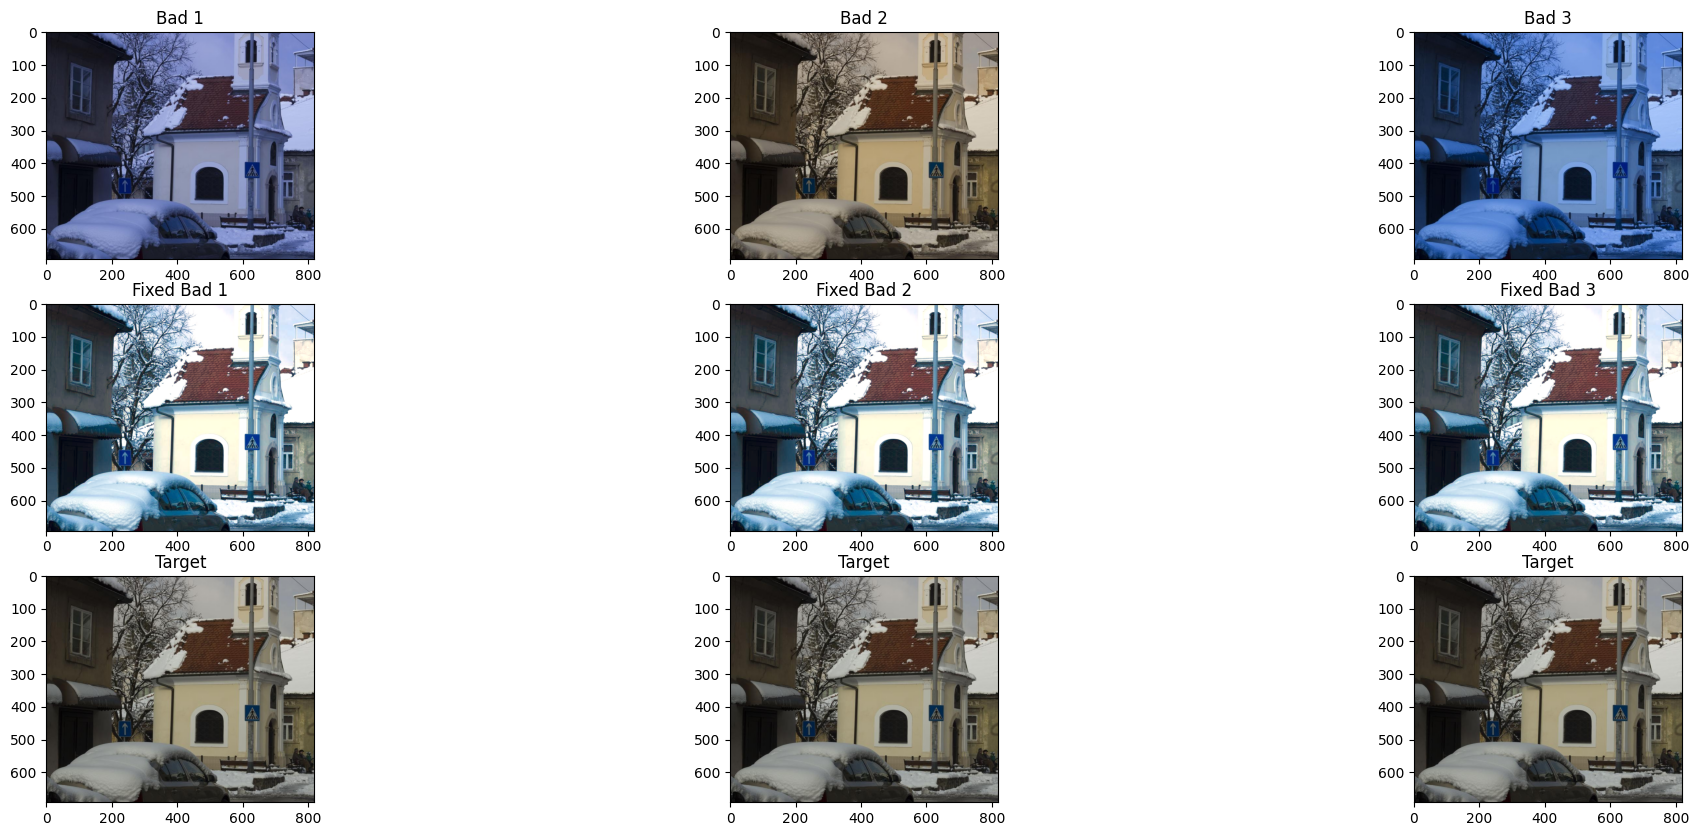

In [3]:
# Define white patch and the coefficients
def white_patch(img, x, y):
    row, col = x, y 
    white = bad_wb_3[row, col, :]
    coeffs = 255.0/white
    
    # Apply white balancing and generate balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = bad_wb_3[..., channel] * coeffs[channel]
    
    # White patching does not guarantee that the dynamic range is preserved, images must be clipped.
    balanced = balanced/255
    balanced[balanced > 1] = 1
    return balanced

plt.subplot(331), plt.imshow(bad_wb_1), plt.title("Bad 1")
plt.subplot(332), plt.imshow(bad_wb_2), plt.title("Bad 2")
plt.subplot(333), plt.imshow(bad_wb_3), plt.title("Bad 3")
plt.subplot(334), plt.imshow(white_patch(bad_wb_1, 620, 220)), plt.title("Fixed Bad 1")
plt.subplot(335), plt.imshow(white_patch(bad_wb_2, 620, 220)), plt.title("Fixed Bad 2")
plt.subplot(336), plt.imshow(white_patch(bad_wb_3, 620, 220)), plt.title("Fixed Bad 3")
plt.subplot(337), plt.imshow(target), plt.title("Target")
plt.subplot(338), plt.imshow(target), plt.title("Target")
plt.subplot(339), plt.imshow(target), plt.title("Target")

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: title={'center': 'Target'}>,
 Text(0.5, 1.0, 'Target'))

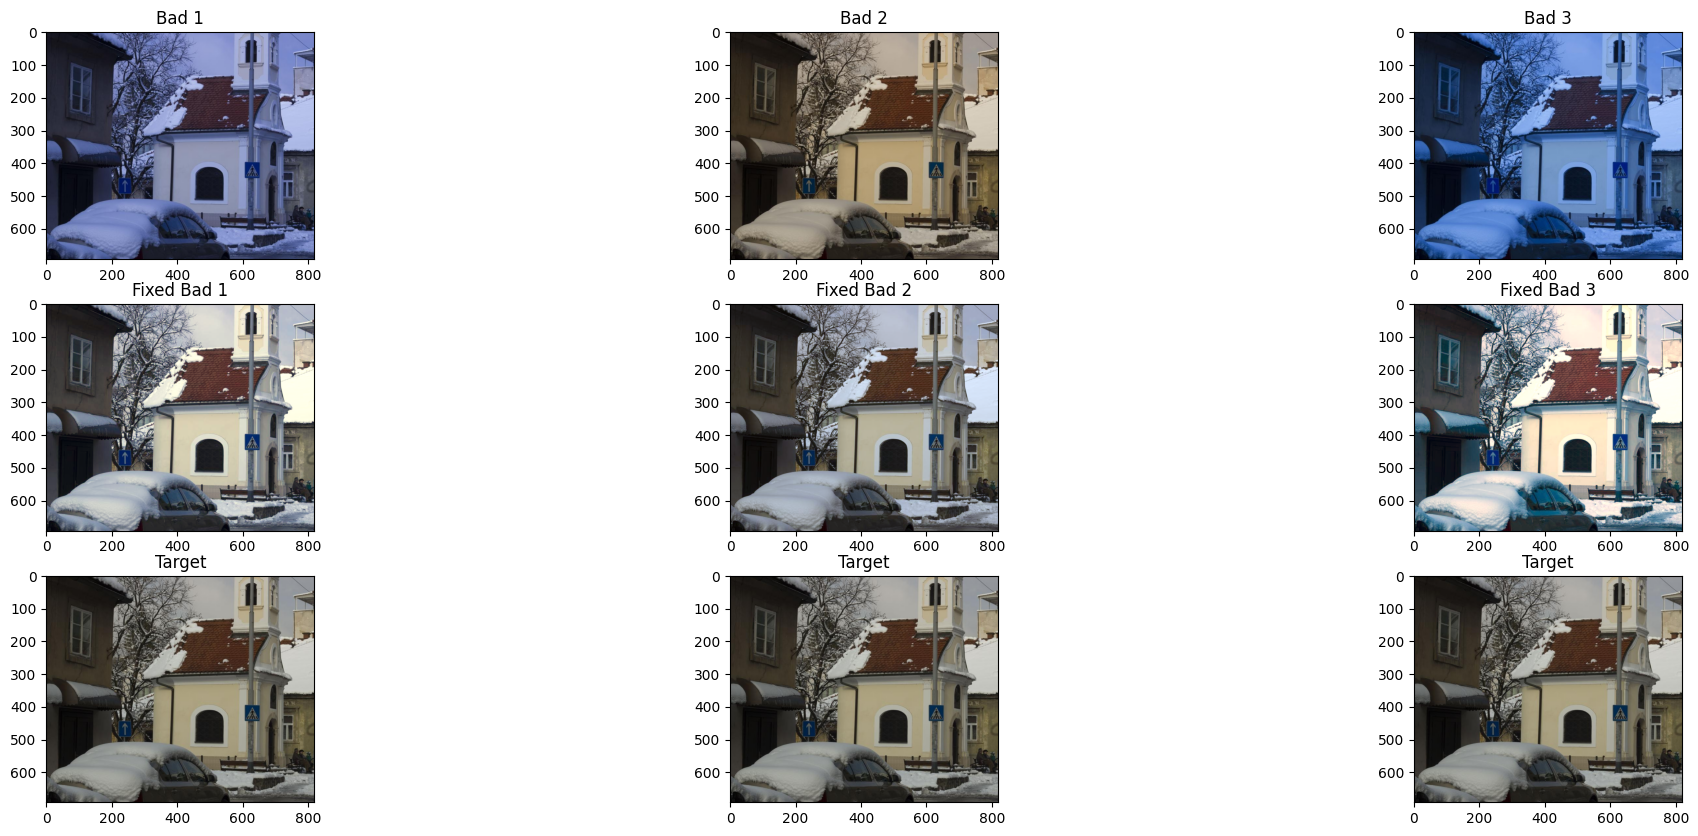

In [4]:
# Load your image
def gray_world(img):
    
    # Compute the mean values for all three colour channels (red, green, blue)
    r, g, b = cv2.split(img)
    # Checking if I got it right
    mean_r = (r.sum()/r.size)
    assert mean_r == r.mean()
    mean_r = mean_r/255.0
    mean_g = g.mean()/255.0
    mean_b = b.mean()/255.0
    
    # Compute the coefficients kr, kg, kb
    # Note: there are 3 coefficients to compute but we only have 2 equations.
    # Therefore, you have to make an assumption, fix the value of one of the
    # coefficients and compute the remining two
    # Hint: You can fix the coefficient of the brightest colour channel to 1.
    max_ = max([mean_r, mean_g, mean_b])
    kr = max_/(mean_r)
    kg = max_/(mean_g)
    kb = max_/(mean_b)
    
    koef_map = {0: kr, 1: kg, 2: kb}
    # Apply color balancing and generate the balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = img[..., channel] * koef_map[channel]
    
    balanced = balanced/255
    balanced[balanced > 1] = 1
    return balanced
    
# Show the original and the balanced image side by side  
plt.subplot(331), plt.imshow(bad_wb_1), plt.title("Bad 1")
plt.subplot(332), plt.imshow(bad_wb_2), plt.title("Bad 2")
plt.subplot(333), plt.imshow(bad_wb_3), plt.title("Bad 3")
plt.subplot(334), plt.imshow(gray_world(bad_wb_1)), plt.title("Fixed Bad 1")
plt.subplot(335), plt.imshow(gray_world(bad_wb_2)), plt.title("Fixed Bad 2")
plt.subplot(336), plt.imshow(gray_world(bad_wb_3)), plt.title("Fixed Bad 3")
plt.subplot(337), plt.imshow(target), plt.title("Target")
plt.subplot(338), plt.imshow(target), plt.title("Target")
plt.subplot(339), plt.imshow(target), plt.title("Target")

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: title={'center': 'Target'}>,
 Text(0.5, 1.0, 'Target'))

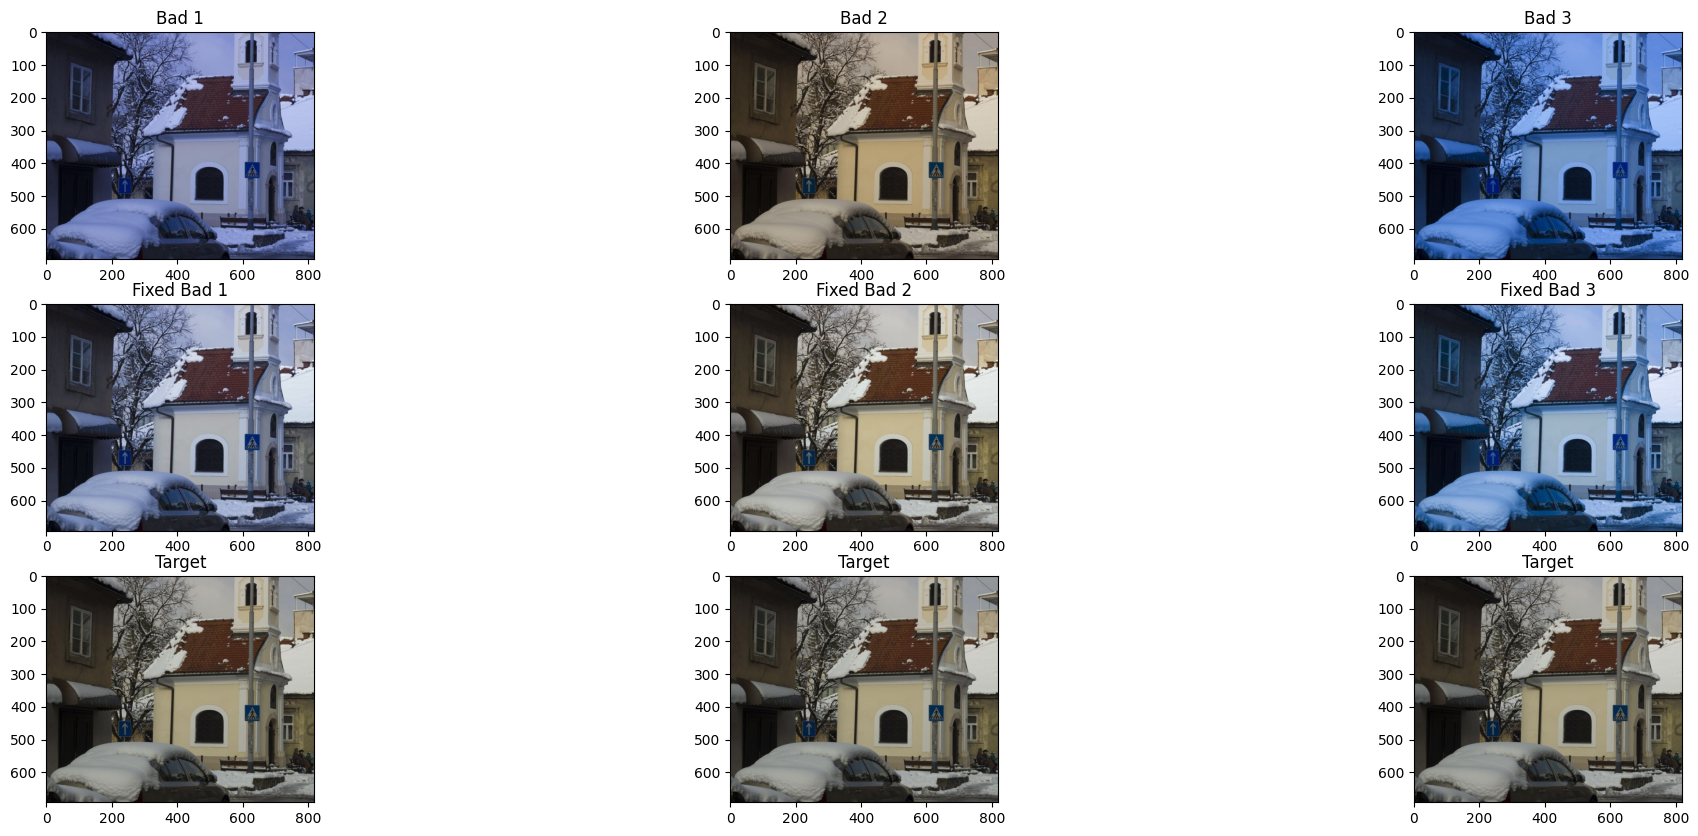

In [5]:
# Load your image
def scale_by_max(img):
    r, g, b = cv2.split(img)
    
    # Compute the maximum values for all three colour channels (red, green, blue)
    max_r = r.max()
    max_g = g.max()
    max_b = b.max()

    kr = 255.0/(max_r)
    kg = 255.0/(max_g)
    kb = 255.0/(max_b)
    
    koef_map = {0: kr, 1: kg, 2: kb}

    balanced = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        balanced[..., channel] = img[..., channel] * koef_map[channel]
    
    balanced = balanced/255
    balanced[balanced > 1] = 1
    return balanced
    
plt.subplot(331), plt.imshow(bad_wb_1), plt.title("Bad 1")
plt.subplot(332), plt.imshow(bad_wb_2), plt.title("Bad 2")
plt.subplot(333), plt.imshow(bad_wb_3), plt.title("Bad 3")
plt.subplot(334), plt.imshow(scale_by_max(bad_wb_1)), plt.title("Fixed Bad 1")
plt.subplot(335), plt.imshow(scale_by_max(bad_wb_2)), plt.title("Fixed Bad 2")
plt.subplot(336), plt.imshow(scale_by_max(bad_wb_3)), plt.title("Fixed Bad 3")
plt.subplot(337), plt.imshow(target), plt.title("Target")
plt.subplot(338), plt.imshow(target), plt.title("Target")
plt.subplot(339), plt.imshow(target), plt.title("Target")